In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_csv('epi_r.csv')

## Use Ingredient and Keyword List to Predict Rating

In [3]:
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
list(raw_data)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [5]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

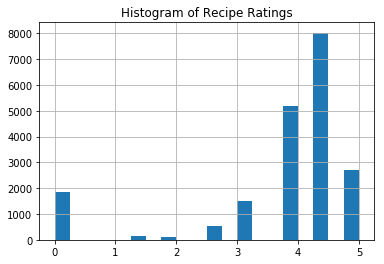

In [6]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [7]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [8]:
# takes long time

from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data.rating
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [9]:
# takes long time

from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

array([0.01818511, 0.026411  , 0.03037705, 0.01957949, 0.02451197])

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

When you've finished that, also take a moment to think about bias. Is there anything in this dataset that makes you think it could be biased, perhaps extremely so?

There is. Several things in fact, but most glaringly is that we don't actually have a random sample. It could be, and probably is, that the people more likely to choose some kinds of recipes are more likely to give high reviews.

After all, people who eat chocolate might just be happier people.

In [10]:
raw_data['rating'].value_counts()

4.375    8019
3.750    5169
5.000    2719
0.000    1836
3.125    1489
2.500     532
1.250     164
1.875     124
Name: rating, dtype: int64

In [11]:
raw_data['rating_high'] = np.where(raw_data['rating'] >= 4.0, 1, 0)

Defined 'rating_high" as greater than 4.0



In [12]:
raw_data['rating_high'].value_counts()

1    10738
0     9314
Name: rating_high, dtype: int64

In [13]:
raw_data.dtypes

title                     object
rating                   float64
calories                 float64
protein                  float64
fat                      float64
sodium                   float64
#cakeweek                float64
#wasteless               float64
22-minute meals          float64
3-ingredient recipes     float64
30 days of groceries     float64
advance prep required    float64
alabama                  float64
alaska                   float64
alcoholic                float64
almond                   float64
amaretto                 float64
anchovy                  float64
anise                    float64
anniversary              float64
anthony bourdain         float64
aperitif                 float64
appetizer                float64
apple                    float64
apple juice              float64
apricot                  float64
arizona                  float64
artichoke                float64
arugula                  float64
asian pear               float64
          

In [14]:
from sklearn.decomposition import PCA

array = raw_data.values
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data.rating_high
# feature extraction
pca = PCA(n_components=30)
fit = pca.fit_transform(X)
fit_2 = pca.fit(X)
# summarize components
print("Explained Variance: {}".format(fit_2.explained_variance_ratio_.sum()))
print(fit_2.components_)

Explained Variance: 0.5129655305504848
[[ 2.80643380e-04  6.46655403e-05  9.73999794e-06 ...  1.74846288e-04
  -1.06487289e-02  2.56099905e-02]
 [ 8.56862190e-04 -3.07168951e-05 -1.09117535e-03 ...  5.22725646e-04
  -1.17406964e-02  2.73846829e-02]
 [ 1.54908163e-04  7.47202727e-06 -2.01772251e-05 ... -5.34452513e-05
  -1.13810848e-02 -1.66742392e-01]
 ...
 [-4.48995235e-04 -8.47704951e-05 -1.56733943e-03 ...  7.71531082e-04
  -2.65579587e-02  1.40621384e-03]
 [-1.04893736e-03 -1.18995439e-04  3.90833853e-04 ...  2.82001321e-04
   9.92070612e-03  1.09488586e-02]
 [ 6.30463710e-04 -4.32320107e-05  7.73447401e-04 ...  6.77496743e-04
  -3.47920643e-02  1.39712740e-02]]


In [15]:
fit_2.explained_variance_ratio_.sum()

0.5129655305504848

In [16]:
from sklearn.svm import SVC
svc = SVC()

In [18]:
import time
t0 = time.time()
print (svc.fit(X,Y).score(X,Y))
print ('Took: {} seconds to run'.format(time.time() - t0))

1.0
Took: 166.3599717617035 seconds to run


In [19]:
t0 = time.time()
print (svc.fit(fit, Y).score(fit,Y))
print ('Took: {} seconds to run'.format(time.time() - t0))

1.0
Took: 1.9832839965820312 seconds to run


In [20]:
cross_val_score(svc, X, Y, cv=5)

array([1., 1., 1., 1., 1.])

In [20]:
X1 = X[['drink', 'dinner', 'spirit', 'christmas']]

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, Y)

In [23]:
svc.fit(x_train, y_train).score(x_test, y_test)

0.5619389587073609

# Summary

We ended up with a score of 1.0 for both the SVC and SVC (with PCA). To double check that this was not an error, a third SVC was run on just 4 columns.  The 4 column SVC only returned a 0.56.  Since our dataset was large enough, our machine learning performed well enough to get a perfect 1.0.  The SVC run on 675 columns took a lot longer than the SVC run with 30 principle components, but both models yielded the same results. The SVC with PCA would be the better model to run.

# Other Thoughts

This data was from epicurious.com.  The ratings on this website do not represent everyone equally, as it
only represents those who submitted ratings.  People on Epicurious probably are into cooking more than the 
average person.

Although there are a large number of recipes, it appears the ratings are averages.  We do not know how 
many people submitted ratings.

Time of the year would influence taste preferences - for example, pumpkin pie around Thanksgiving.